# Importing the data
dataset source
> https://www.kaggle.com/datasets/shreyapmaher/fruits-dataset-images/data

In [1]:
!pip install --upgrade kagglehub

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.1/40.1 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 70.6/70.6 kB 2.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.4/160.4 kB 9.0 MB/s eta 0:00:00
  Attempting uninstall: kagglehub
    Found existing installation: kagglehub 0.3.13
    Uninstalling kagglehub-0.3.13:
      Successfully uninstalled kagglehub-0.3.13


In [2]:
# Download the dataset from kaggle
import kagglehub

path = kagglehub.dataset_download("shreyapmaher/fruits-dataset-images", output_dir= "contents/")
print("Path to dataset files:", path)

Using Colab cache for faster access to the 'fruits-dataset-images' dataset.
Path to dataset files: /kaggle/input/fruits-dataset-images


In [3]:
import os

base_dir = "/kaggle/input/fruits-dataset-images/images"

classes = os.listdir(base_dir)
print("classes:", classes)
print("number of classes:", len(classes))

for cls in classes:
    n_files = len(os.listdir(os.path.join(base_dir, cls)))
    print(f"{cls:20s} : {n_files} items")

classes: ['apple fruit', 'orange fruit', 'strawberry fruit', 'grapes fruit', 'banana fruit', 'cherry fruit', 'kiwi fruit', 'mango fruit', 'chickoo fruit']
number of classes: 9
apple fruit          : 40 items
orange fruit         : 40 items
strawberry fruit     : 40 items
grapes fruit         : 40 items
banana fruit         : 40 items
cherry fruit         : 40 items
kiwi fruit           : 40 items
mango fruit          : 40 items
chickoo fruit        : 40 items


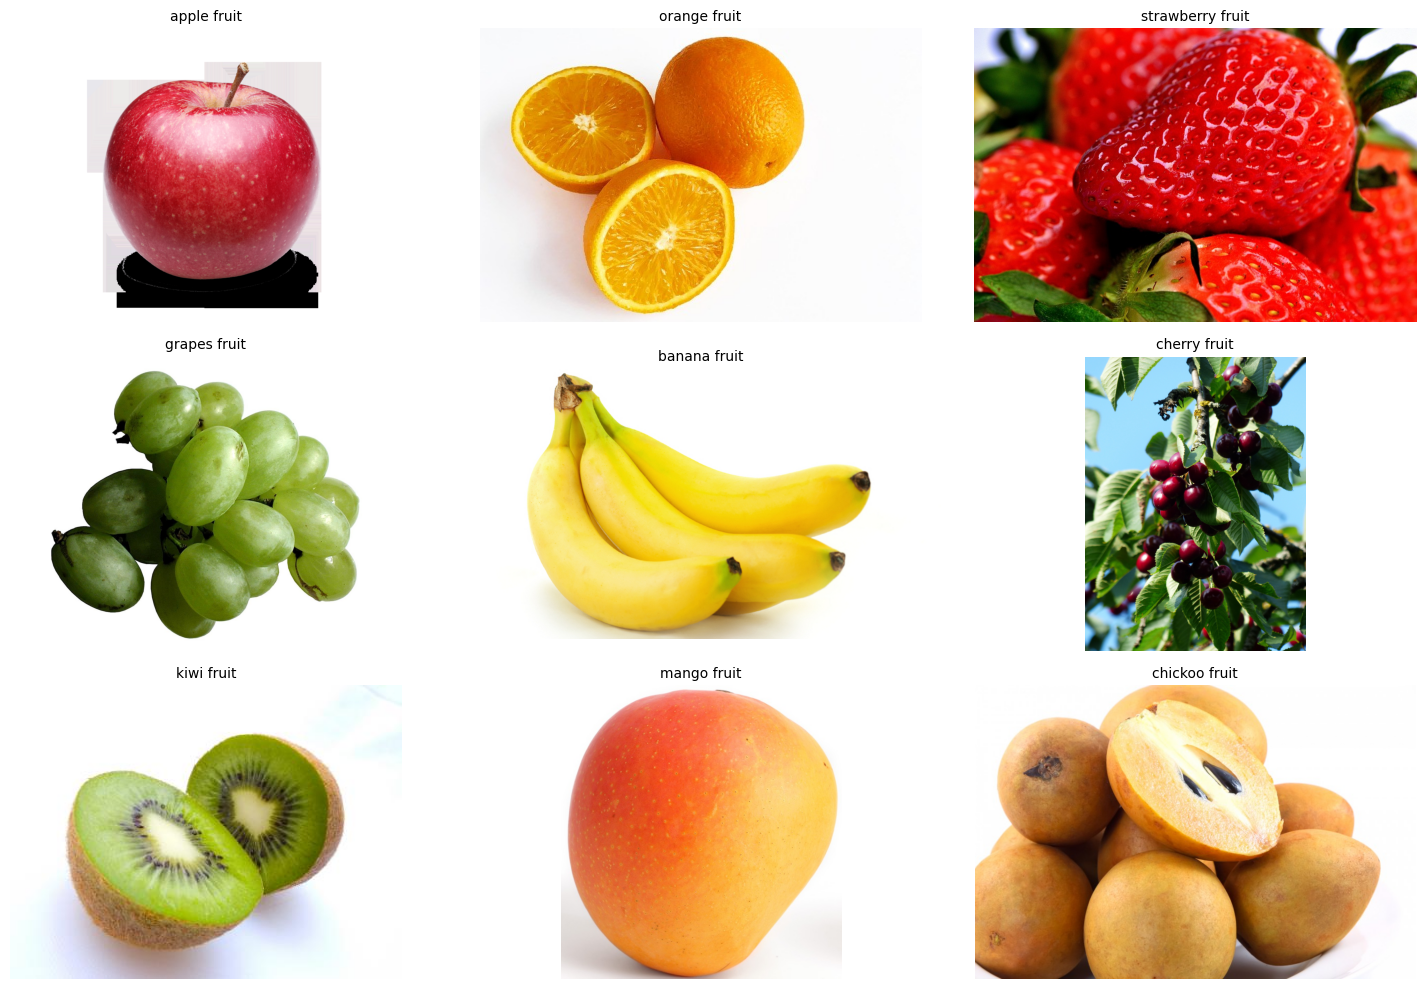

In [4]:
# checking some of the data
import matplotlib.pyplot as plt
import cv2
import random

plt.figure(figsize=(15, 10))
for i, cls in enumerate(classes[:9]):
    folder_path = os.path.join(base_dir, cls)
    img_name = random.choice(os.listdir(folder_path))
    img_path = os.path.join(folder_path, img_name)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

    plt.subplot(3, 3, i + 1)
    plt.imshow(img)
    plt.title(cls, fontsize=10)
    plt.axis("off")
plt.tight_layout()
plt.show()

# Preprocessing

> In this part, I will convert the images into pytorch dataset.

In [5]:
import pandas as pd
import os
import torch
from torch.utils.data import Dataset, DataLoader
import torchvision
from torchvision.io import read_image
from torchvision import transforms
from torchvision.datasets import ImageFolder

In [6]:
# create directory for training and testing
target_dir = "/content/fruits_split"
train_dir  = os.path.join(target_dir, "train")
test_dir   = os.path.join(target_dir, "test")

os.makedirs(train_dir, exist_ok=True)
os.makedirs(test_dir, exist_ok=True)

train_ratio = 0.8

In [7]:
# split per class
import shutil

for cls in classes:
    class_path = os.path.join(base_dir, cls)
    images = os.listdir(class_path)
    random.shuffle(images)

    split_idx = int(len(images) * train_ratio)
    train_imgs = images[:split_idx]
    test_imgs  = images[split_idx:]

    # create class subfolder inside the train and test directory
    os.makedirs(os.path.join(train_dir, cls), exist_ok=True)
    os.makedirs(os.path.join(test_dir, cls), exist_ok=True)

    # copy image to train folder
    for img in train_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(train_dir, cls, img))

    # copy image to test folder
    for img in test_imgs:
        shutil.copy(os.path.join(class_path, img), os.path.join(test_dir, cls, img))

In [8]:
# count the data just to be sure
def count_images(folder):
    counts = {}
    for cls in sorted(os.listdir(folder)):
        path = os.path.join(folder, cls)
        if os.path.isdir(path):
            counts[cls] = len(os.listdir(path))
    return counts

train_counts = count_images(train_dir)
test_counts = count_images(test_dir)

print("\nNumber of images in TRAIN folder:")
for k, v in train_counts.items():
    print(f"{k:20s}: {v}")

print("\nNumber of images in TEST folder:")
for k, v in test_counts.items():
    print(f"{k:20s}: {v}")


Number of images in TRAIN folder:
apple fruit         : 32
banana fruit        : 32
cherry fruit        : 32
chickoo fruit       : 32
grapes fruit        : 32
kiwi fruit          : 32
mango fruit         : 32
orange fruit        : 32
strawberry fruit    : 32

Number of images in TEST folder:
apple fruit         : 8
banana fruit        : 8
cherry fruit        : 8
chickoo fruit       : 8
grapes fruit        : 8
kiwi fruit          : 8
mango fruit         : 8
orange fruit        : 8
strawberry fruit    : 8


In [9]:
# in this part, I will convert the images to tensor and create the dataloader

transform = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor()])

# train set
train_dataset = ImageFolder(root=train_dir, transform=transform)
train_dataloader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# test set
test_dataset = ImageFolder(root='/content/fruits_split/test', transform=transform)
test_dataloader = DataLoader(test_dataset, batch_size=64, shuffle=True)

In [10]:
# check train set to be safe
print('no. of classes in train_dataset: ', len(train_dataset.classes))
train_dataset

no. of classes in train_dataset:  9


Dataset ImageFolder
    Number of datapoints: 287
    Root location: /content/fruits_split/train
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

In [11]:
# check test set to be safe
print('no. of classes in test_dataset: ', len(test_dataset.classes))
test_dataset

no. of classes in test_dataset:  9


Dataset ImageFolder
    Number of datapoints: 72
    Root location: /content/fruits_split/test
    StandardTransform
Transform: Compose(
               Resize(size=(224, 224), interpolation=bilinear, max_size=None, antialias=True)
               ToTensor()
           )

# Building the model

In [12]:
from torch import nn

In [13]:
device = torch.accelerator.current_accelerator().type if torch.accelerator.is_available() else "cpu"
print(f"Using {device} device")

Using cuda device


In [22]:
# placing the dataset inside the device

for images, labels in train_dataloader:
    images, labels = images.to(device), labels.to(device)

for images, labels in test_dataloader:
    images, labels = images.to(device), labels.to(device)

In [23]:
samples = next(iter(train_dataloader))
print(f"batch shape: {samples[0].shape}")
print(f"target shape: {samples[1].shape}")

batch shape: torch.Size([64, 3, 224, 224])
target shape: torch.Size([64])


In [71]:
# I will just make a simple cnn model
# This documentation helped me: https://docs.pytorch.org/docs/stable/nn.html#convolution-layers

class NeuralNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.cnn = nn.Sequential(
            nn.Conv2d(3, 64, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),

            nn.Conv2d(64, 128, 3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(2),
            nn.AdaptiveAvgPool2d((7, 7)),

            nn.Flatten(),
            nn.Linear(128 * 7 * 7, 512),
            nn.ReLU(),
            nn.Linear(512, 9),
        )

    def forward(self, x):
        x = self.cnn(x)
        return x

In [72]:
# send the model to the device

model = NeuralNetwork().to(device)
print(model)

NeuralNetwork(
  (cnn): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (3): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (4): ReLU()
    (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (6): AdaptiveAvgPool2d(output_size=(7, 7))
    (7): Flatten(start_dim=1, end_dim=-1)
    (8): Linear(in_features=6272, out_features=512, bias=True)
    (9): ReLU()
    (10): Linear(in_features=512, out_features=9, bias=True)
  )
)


# Training the model

In [76]:
# I copy-pasted these loops from the practice notebooks given
# I modified the for loops so that it matches with the device where the model and the dataset was in

def train_loop(dataloader, model, loss_fn, optimizer):
    size = len(dataloader.dataset)

    model.train()
    for batch, (X, y) in enumerate(dataloader):
        # place all to device
        X, y = X.to(device), y.to(device)

        pred = model(X)
        loss = loss_fn(pred, y)

        loss.backward()
        optimizer.step()
        optimizer.zero_grad()

        if batch % 100 == 0:
            loss, current = loss.item(), batch * batch_size + len(X)
            print(f"loss: {loss:>7f}  [{current:>5d}/{size:>5d}]")


def test_loop(dataloader, model, loss_fn):
    model.eval()
    size = len(dataloader.dataset)
    num_batches = len(dataloader)
    test_loss, correct = 0, 0

    with torch.no_grad():
        for X, y in dataloader:
            # place all to device
            X = X.to(device)
            y = y.to(device)

            pred = model(X)
            test_loss += loss_fn(pred, y).item()
            correct += (pred.argmax(1) == y).type(torch.float).sum().item()

    test_loss /= num_batches
    correct /= size
    print(f"Test Error: \n Accuracy: {(100*correct):>0.1f}%, Avg loss: {test_loss:>8f} \n")

In [77]:
learning_rate = 1e-3
batch_size = 64
epochs = 5

In [78]:
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=learning_rate)

epochs = 10
for t in range(epochs):
    print(f"Epoch {t+1}\n-------------------------------")
    train_loop(train_dataloader, model, loss_fn, optimizer)
    test_loop(test_dataloader, model, loss_fn)
print("Done!")

Epoch 1
-------------------------------
loss: 2.181409  [   64/  287]
Test Error: 
 Accuracy: 29.2%, Avg loss: 2.001537 

Epoch 2
-------------------------------
loss: 2.073469  [   64/  287]
Test Error: 
 Accuracy: 33.3%, Avg loss: 1.894677 

Epoch 3
-------------------------------
loss: 1.753974  [   64/  287]
Test Error: 
 Accuracy: 34.7%, Avg loss: 1.682583 

Epoch 4
-------------------------------
loss: 1.686707  [   64/  287]
Test Error: 
 Accuracy: 43.1%, Avg loss: 2.120085 

Epoch 5
-------------------------------
loss: 1.468155  [   64/  287]
Test Error: 
 Accuracy: 48.6%, Avg loss: 1.527269 

Epoch 6
-------------------------------
loss: 1.262769  [   64/  287]
Test Error: 
 Accuracy: 47.2%, Avg loss: 1.603887 

Epoch 7
-------------------------------
loss: 1.204314  [   64/  287]
Test Error: 
 Accuracy: 51.4%, Avg loss: 1.519723 

Epoch 8
-------------------------------
loss: 0.881934  [   64/  287]
Test Error: 
 Accuracy: 48.6%, Avg loss: 1.314317 

Epoch 9
----------------

# Conclusion

> In this activity, I was able to create my own model from scratch for image classification. The dataset I used was a very small dataset from Kaggle. As seen above, the accuracy of the model I made was 48.6% after 10 epochs. Considering the small dataset and how simple the model I created, I think it is safe to say that the I was able to demonstrate that the model is functional.